In [54]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [55]:
import os
import os.path as op

In [56]:
group_names = ["group"+str(i) for i in range(1,19)]

In [59]:
group = "group1"
number = group.split("p")[-1]

with open("phage_by_group.txt") as prelim_groups:
    phage_grp = {}
    phages = []
    groups = []
    for line in prelim_groups:
        line = line.rstrip("\n")
        vec = line.split("\t")
        phage_grp[vec[0]] = vec[1]
        phages.append(vec[0])
        groups
    groups = list(phage_grp.values())
    phages = list(phage_grp.keys())

groups2 = ["group%s" % g.split(":")[-1] for g in groups]

unique=[]
for value in groups:
    if value not in unique:
        unique.append(value)

group1=[]
for value in phage_grp.keys():
    if phage_grp.get(value)=='CNSv2.0:%s' % number:
        group1.append(value)



In [74]:
from collections import Counter
Counter(groups2)

Counter({'group1': 62,
         'group10': 2,
         'group11': 9,
         'group12': 5,
         'group13': 3,
         'group14': 7,
         'group15': 21,
         'group16': 4,
         'group17': 10,
         'group18': 2,
         'group2': 8,
         'group3': 7,
         'group4': 44,
         'group5': 15,
         'group6': 35,
         'group7': 22,
         'group8': 14,
         'group9': 13,
         'groupNoGroup': 4})

In [58]:
if op.exists("./coverage_plots_pre/") == False:
    os.makedir("./coverage_plots_pre/")
    
for g in group_names:
    print(g)
    if op.exists("./coverage_plots_pre/%s" % g) == False:
        os.mkdir("./coverage_plots_pre/%s" % g)

group1
group2
group3
group4
group5
group6
group7
group8
group9
group10
group11
group12
group13
group14
group15
group16
group17
group18


In [75]:
%%R -i groups2 -i phages
plotnames <- c()
for (s in seq(1, length(groups))){
    group <- groups2[s]
    item <- phages[s]
    
    filename<-paste(group,"/",item,"step1.contig1.genomecoverage.txt",sep="")
    print(filename)
    coverage<-read.table(filename, sep="\t")
    #with(coverage, plot(V2, V3, type="l", col="aquamarine", cex=2))
    coverage %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage", title=item)-> p

    outname = paste("./coverage_plots_pre/",group,"/",item,"png", sep="")
    print(outname)
    png(filename=outname, width=800, height=400, units="px")
    plot(p)
    dev.off()
    
    plotnames = c(plotnames, outname)
}

[1] "group6/1.206.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.206.O.png"
[1] "group4/1.237.B.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.237.B.png"
[1] "group4/1.267.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.267.O.png"
[1] "group8/1.015.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group8/1.015.O.png"
[1] "group7/1.100.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group7/1.100.O.png"
[1] "group6/1.239.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.239.O.png"
[1] "group4/1.196.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group4/1.196.O.png"
[1] "group6/1.134.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group6/1.134.O.png"
[1] "group13/2.117.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group13/2.117.O.png"
[1] "group1/1.278.O.step1.contig1.genomecoverage.txt"
[1] "./coverage_plots_pre/group1/1.278.O.png

In [35]:
%%R -i groups2 -i phages -w 800
plotnames = c()
for (item in group1[c(1,2)]){
    filename<-paste(group,"/",item,"step1.contig1.genomecoverage.txt",sep="")
    coverage<-read.table(filename, sep="\t")
    #with(coverage, plot(V2, V3, type="l", col="aquamarine", cex=2))
    coverage %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw() + labs(x="Genome Position", y="Raw Read Coverage", title=item)-> p

    outname = paste("./coverage_plots_pre/",group,"/",item,"png", sep="")
    print(outname)
    png(filename=outname, width=800, height=400, units="px")
    plot(p)
    dev.off()
    
    plotnames = c(plotnames, outname)
}

[1] "./coverage_plots_pre/group1/1.278.O.png"
[1] "./coverage_plots_pre/group1/1.289.A.png"


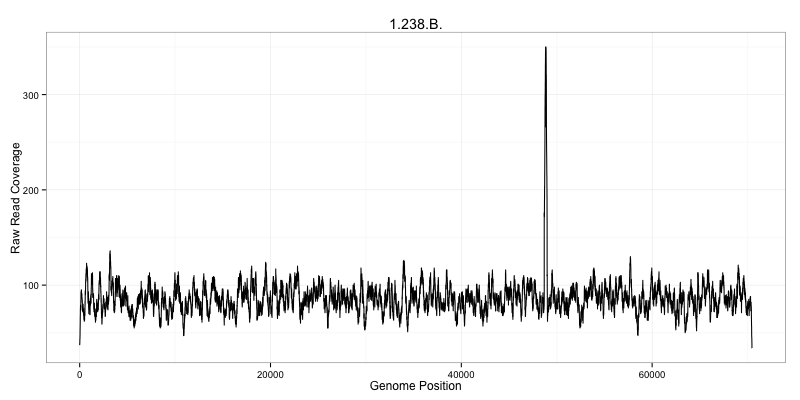

In [52]:
Image(plotnames[100])

In [53]:
plotnames[100]

'./coverage_plots_pre/group5/1.238.B.png'

In [ ]:
ls("./coverage_plots_pre/group1/")